In [1]:
# Import libraries
import csv
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split

### Data Cleaning and Manipulation

In [2]:
# Read the tsv files using pandas and delimit with tabs to retain the csv format

basics = pd.read_csv('basics.tsv', sep='\t', header=0)
basics.drop_duplicates(keep=False)
#basics.head()

ratings = pd.read_csv('ratings.tsv', sep = '\t', header = 0)
ratings.drop_duplicates(keep=False)
#ratings.head()

crew = pd.read_csv('crew.tsv', sep= '\t', header=0)
crew.drop_duplicates(keep=False)
#crew.head()

c:\users\sgupt\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
5,tt0000006,nm0005690,\N
6,tt0000007,"nm0374658,nm0005690",\N
7,tt0000008,nm0005690,\N
8,tt0000009,nm0085156,nm0085156
9,tt0000010,nm0525910,\N


In [3]:
# Merge three dataframes
ratings_basics_df = pd.merge(basics, ratings, on='tconst', how = 'outer')
ratings_basics_crew_df = pd.merge(ratings_basics_df, crew, on= 'tconst', how='outer')
ratings_basics_crew_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1471.0,nm0005690,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,177.0,nm0721526,\N
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,1097.0,nm0721526,\N
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.5,106.0,nm0721526,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,1804.0,nm0005690,\N


In [4]:
# Check for NAs and missing values
#ratings_basics_df.isnull()
ratings_basics_crew_df.update(ratings_basics_df[['averageRating', 'numVotes']].fillna(0))


In [5]:
# Get summary of all the colunns in the dataframe
include = ['object', 'float', 'int']
ratings_basics_crew_df.describe(include = include)

,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
count,5682274,5682274,5682267,5682267,5682274,5682274,5682274,5682268,5.682274e+06,5.682274e+06,5682274,5682274
unique,5682274,10,2935030,2949647,246,94,810,2226,NaN,NaN,662522,936650
top,tt6732244,tvEpisode,Episode #1.1,Episode #1.1,2017,\N,\N,Drama,NaN,NaN,\N,\N
freq,1,3916660,31113,31119,312428,5635475,3965281,488202,NaN,NaN,2392720,2814175
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.125060e+00,1.560440e+02,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.613580e+00,6.230267e+03,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN


In [6]:
# To remove the records for tv shows
movies = ratings_basics_crew_df.loc[ratings_basics_crew_df['titleType'] == 'movie']
movies.describe(include= include)

,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
count,512579,512579,512579,512579,512579,512579,512579,512579,512579.000000,5.125790e+05,512579,512579
unique,512579,1,448621,456958,218,1,463,1418,NaN,NaN,188135,272800
top,tt8409262,movie,Home,\N,\N,\N,\N,Drama,NaN,NaN,\N,\N
freq,1,512579,49,48,51606,512579,190988,89417,NaN,NaN,46503,129974
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.812757,1.435893e+03,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.228545,2.008821e+04,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.200000,3.400000e+01,NaN,NaN


In [7]:
# Sanity check for dups in the consolidated and subsetted movies dataframe
print ('Number of duplicates in movies: {}'.format(
    sum(movies.duplicated(keep=False))))

Number of duplicates in movies: 0


In [14]:
pd.options.mode.chained_assignment = None  # default='warn'
# Basic pre-processing of text columns
def preprocess_title(title):
    title = title.lower()
    title = title.replace(',', ' ')
    title = title.replace("'", '')    
    title = title.replace('&', 'and')
    title = title.replace('?', '')
    return title.strip()

movies['titleType'] = movies['titleType'].map(preprocess_title)
movies['primaryTitle'] = movies['primaryTitle'].map(preprocess_title)
movies['originalTitle'] = movies['originalTitle'].map(preprocess_title)
movies['directors'] = movies['directors'].map(preprocess_title)

# Preprocessign the year columns, replace \\N with 0

movies.loc[movies.directors == '\\N', 'directors'] = ''
movies.loc[movies.writers == '\\N', 'writers'] = ''
# Converting columns like startYEar and averageRating to be float
#movies.loc[movies.startYear == '\\N', startYear] = 0
movies['startYear'] = movies['startYear'].astype(float)
movies['averageRating'] = movies['averageRating'].astype(float)

### Building a predictive model using Linear Regression

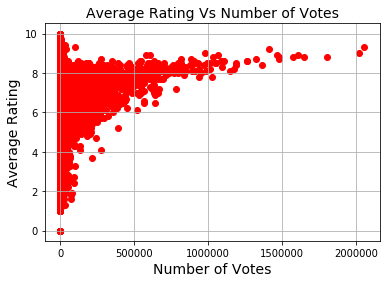

In [19]:
# Checking for linear relationship assumption between the dependent variable which is averageRating and the independent variables
plt.scatter(movies['numVotes'], movies['averageRating'], color='red')
plt.title('Average Rating Vs Number of Votes', fontsize=14)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)
plt.show()

#### From the above graph, the assumption is incorrect and it seems that these two variables have a positive weak nonlinear association.

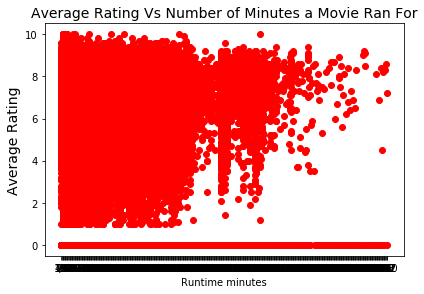

In [20]:
# The other independent variable to check for linearity is runtimeMinutes
plt.scatter(movies['runtimeMinutes'], movies['averageRating'], color='red')
plt.title('Average Rating Vs Number of Minutes a Movie Ran For', fontsize=14)
plt.tight_layout()
plt.xlabel('Runtime minutes')
plt.ylabel('Average Rating', fontsize=14)
plt.grid(False)
plt.show()

#### From the above graph, there is no linearity between the two variables, thus the assumption for linearity is incorrect

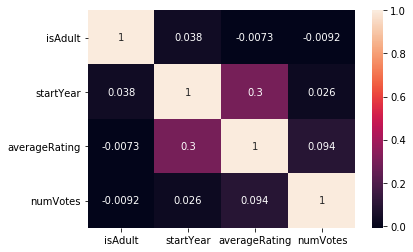

In [45]:
# Ref: https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
# Heat map for showing the correlation between the features from movies dataframe
import seaborn as sns
corr = movies.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [23]:
##Training the model using linear regression


# # Split the dataset into training and testing set
# subset = np.random.rand(len(movies)) < 0.8

# train = movies[subset]
# test = movies[~subset]

X = movies[['startYear', 'genres', 'numVotes']]
Y = movies['averageRating']
X = pd.get_dummies(data=X, drop_first=True)

## Create a Linear Regression Model with required parameters

# lr_model = linear_model.LinearRegression()

# # Fit the model
# lr_model.fit(X, Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
predicted = regr.predict(X_test)

Intercept: 
 -0.9452008617989645
Coefficients: 
 [ 1.67643462e-03  9.09384149e-06  1.55147409e+00 ...  8.60715514e-01
  9.81524188e-01 -1.23699265e+00]


In [24]:
predicted

array([0.31876718, 3.27935769, 3.86298195, ..., 3.06726835, 5.54608153,
       4.69516486])

#### Evaluating RMSE for the linear regression model 

In [25]:
# Evaluation metrics
from sklearn import metrics
#print(np.sqrt(metrics.mean_squared_error(Y_train, )))
print(np.sqrt(metrics.mean_squared_error(Y_test,predicted)))

2.852633857703693
